### Exercise 1: What is a visual argument?

#### Setup

In [1]:
# import pandas to view our data
import pandas as pd

# load datasets
data = pd.read_csv('Tapajos_inventory_data_2010 - Tapajos_inventory_data_2010.csv')
avg_heights = pd.read_csv('average_heights.csv')

1. Run the Setup cell above to import the necessary packages and load our datasets. Then, in the cell below, type `data.head()` and run the cell to preview the first five lines of the full dataset.

In [2]:
## YOUR SOLUTION HERE ##
data.head()

,plot,type,origin,tree,family,genus,scientific_name,common_name,density_wood,dbh,ht_crown_base,ht_total,CALC_ht_total_cm,depth_crown,stem_x,stem_y
0,1,SF,NE,1,Hypericaceae,Vismia,Vismia guianensis,Lacre branco,0.480,5.9,4.5,6.0,600,1.5,1.8,5.5
1,1,SF,NE,2,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,7.4,4.5,7.1,710,2.6,3.5,7.0
2,1,SF,NE,3,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,6.3,5.0,7.1,710,2.1,3.5,0.1
3,1,SF,NE,4,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,5.4,2.3,4.3,430,1.9,5.0,5.0
4,1,SF,NE,5,Chrysobalanaceae,Couepia,Couepia sp.,Macucu,0.791,8.1,7.6,9.3,930,1.7,6.5,1.5


The image below demonstrates the difference between `ht_total`, `ht_crown_base`, and `depth_crown`. `density_wood` is the density of that species of wood (a previously established literature value).

<img src="https://static-assets.codecademy.com/Courses/data-viz-with-python/tree-trunk-diagram.png" alt="`ht_total` refers to the total height of tree: trunk and leaves. `ht_crown_base` refers to the height of the tree's trunk. `depth_crown` refers to the height of the tree's leafy portion." width=400 />

2. Type in `avg_heights` and run the cell to see the whole `avg_heights` dataset and compare the two datasets. What do they have in common, and how are they different?

In [3]:
## YOUR SOLUTION HERE ##
avg_heights

,family,trunk,leaves,total_height
0,Fabaceae,8.250478,7.203633,15.450287
1,Urticaceae,9.109798,4.146398,13.251297
2,Salicaceae,6.042415,4.763158,10.805263
3,Annonaceae,7.748108,5.525405,13.270811
4,Boraginaceae,10.992045,4.327841,15.323295


<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What do the datasets have in common, and how are they different?</i></summary>
While both datasets tell us about the types and size of trees around the Tapajos River in Brazil, `avg_heights` is an aggregated subset of the data in `tree_data`. It takes only five of the families (the 5 most common), and contains only three measures for each family: the average heights of the trunk, the leaf crown, and the full tree. </summary>

### Exercise 2: Choose the right chart for the data

#### Setup

In [1]:
# import matplotlib and pandas
from matplotlib import pyplot as plt
import pandas as pd

# load data
avg_heights = pd.read_csv('average_heights.csv')
avg_heights

,family,trunk,leaves,total_height
0,Fabaceae,8.250478,7.203633,15.450287
1,Urticaceae,9.109798,4.146398,13.251297
2,Salicaceae,6.042415,4.763158,10.805263
3,Annonaceae,7.748108,5.525405,13.270811
4,Boraginaceae,10.992045,4.327841,15.323295


In [2]:
# display charts correctly
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.dpi'] = 75

1. Run the Setup cells to load our data. We’ll work from the `avg_heights` dataset. We want to visualize height, so we’ll use a vertical bar chart. First, make a bar chart of the trunk heights for each family using `avg_heights.trunk`.

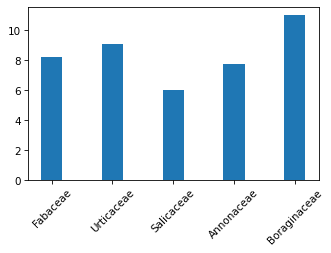

In [3]:
## YOUR SOLUTION HERE ##
plt.bar(avg_heights.family, avg_heights.trunk, width = 0.35)
plt.xticks(rotation = 45) 
plt.show()

2. To visualize the crown (leaf) height, let’s make this a stacked bar chart. Simply make a second bar chart for the crown heights using `avg_heights.leaves`, and add the argument `bottom = avg_heights.trunk` so that the bottom of the leaves bars are positioned at the top of the trunk bars.

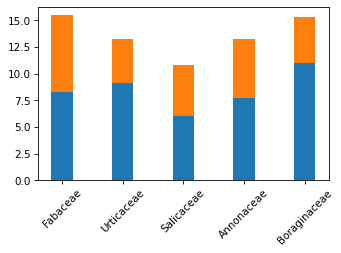

In [4]:
## YOUR SOLUTION HERE ##
plt.bar(avg_heights.family, avg_heights.trunk, width = 0.35)
plt.bar(avg_heights.family, avg_heights.leaves, bottom = avg_heights.trunk, width = 0.35)
plt.xticks(rotation = 45) 
plt.show()

3. For good measure, add in a `title`, `xlabel` and `ylabel`: "Trunk, Crown, and Total Height", "Family", and "Average Height (m)", respectively. If you wish, change the graph colors and/or bar width.

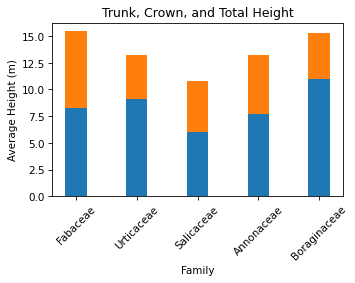

In [5]:
## YOUR SOLUTION HERE ##
plt.bar(avg_heights.family, avg_heights.trunk, width = 0.35)
plt.bar(avg_heights.family, avg_heights.leaves, bottom = avg_heights.trunk, width = 0.35)
plt.title('Trunk, Crown, and Total Height')
plt.xlabel('Family')
plt.ylabel('Average Height (m)')
plt.xticks(rotation = 45) 
plt.show()

### Exercise 3: Use subplots to compare multiple charts

#### Setup

In [7]:
# import matplotlib and pandas
from matplotlib import pyplot as plt
import pandas as pd

# load data
PF_data = pd.read_csv('PF_genus_counts.csv')
SF_data = pd.read_csv('SF_genus_counts.csv')
SLF_data = pd.read_csv('SLF_genus_counts.csv')
PF_data.head()

,genus,counts
0,Psychotria,74
1,Protium,63
2,Otoba,54
3,Pouteria,41
4,Triplaris,35


In [8]:
# display charts correctly
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.dpi'] = 75

This time, our tree data is subsetted by forest type: `PF` (primary forest), `SF` (secondary forest), and `SLF` (selectively logged forest). We’ll use multiple vertical bar charts to compare the counts of the most common trees in each forest type. Our goal for the next few visualizations is to **better understand biodiversity in the three different types of forest**.

1. Run the Setup cells above to load our data, and take a few minutes to look at the subsets. Then, make 3 subplots in a 3-row by 1-column grid. Make a barplot in each subplot, plotting `genus` on the x-axis and `counts` on the y-axis for each. Add an `xlabel` to each x-axis so we can keep track of which graph represents which forest. 

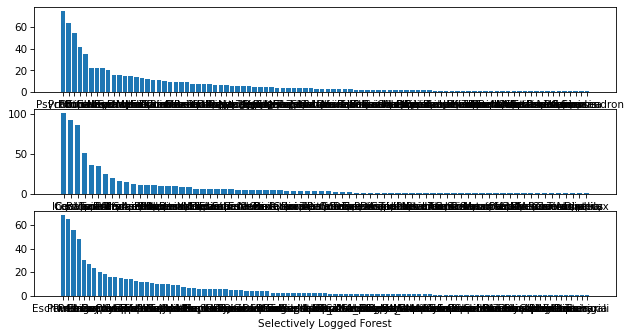

In [9]:
## YOUR SOLUTION HERE ##

plt.figure(figsize = (10, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3, 1, 1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.subplot(3, 1, 2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.subplot(3, 1, 3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')

plt.show()

2. Okay, that's looking pretty hard to read right now -- we'll work on fixing up this graph throughout this exercise and the next one. To start, let's standardize the y-axes. The counts in the Secondary Forest graph are near 100, while the other two reach only to about 70. Change the y-axes range to `(0,105)` for each graph using `plt.ylim()`.

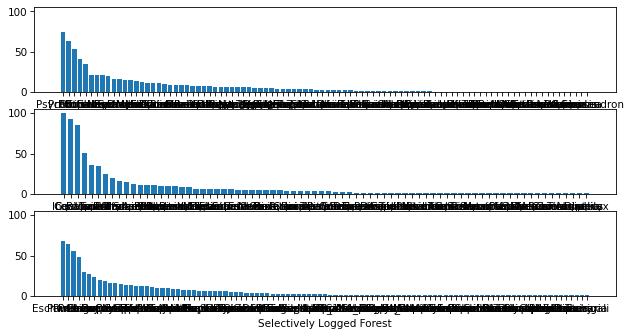

In [10]:
## YOUR SOLUTION HERE ##

plt.figure(figsize = (10, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.subplot(3, 1, 2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.subplot(3, 1, 3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))

plt.show()

3. Looking better already! But do you notice that the bars are _slightly_ wider in the middle graph? Let's standardize the x-axis too, by setting the `xlim` to `(-3, 105)` to give a cushion on either side of the graph.

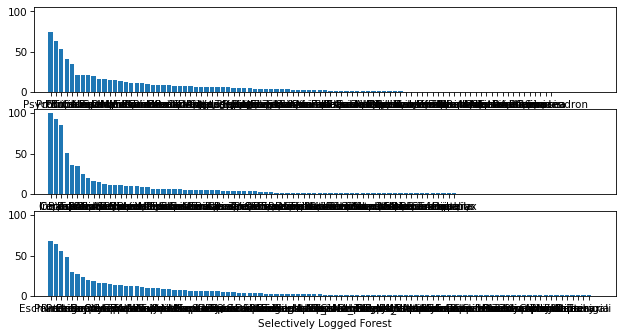

In [11]:
## YOUR SOLUTION HERE ##

plt.figure(figsize=(10, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))

plt.show()

4. Now we have a real visual comparison going -- the number of trees in the top genuses are clearly higher in Secondary Forests, but it looks like Primary and Selectively Logged Forests have _more species_ of trees. Let's clean it up a little more by rotating the labels. Recall that we can use matplotlib's general function `plt.xticks()`, and pass in arguments for horizontal alignment, `ha`, and `rotation`. Set the horizontal alignment equal to `"left"` and the rotation equal to `-45` degrees.

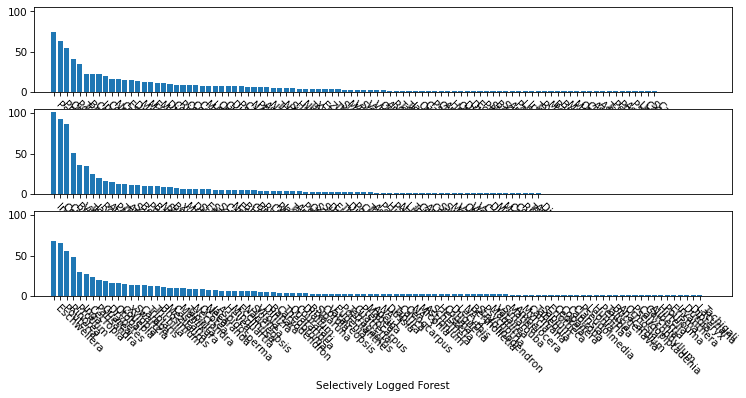

In [12]:
## YOUR SOLUTION HERE ##

plt.figure(figsize=(12, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation = -45)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation = -45)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation = -45)

plt.show()

Well, that's still pretty messy! But we start to see that the _types_ of trees are different in each forest type, regardless of how many there are. Let's dig deeper and keep improving this graph and our visual argument in the next exercise. 

### Exercise 4: Clean up subplots

#### Setup

In [13]:
# import matplotlib and pandas
from matplotlib import pyplot as plt
import pandas as pd

# load data
PF_data = pd.read_csv('PF_genus_counts.csv')
SF_data = pd.read_csv('SF_genus_counts.csv')
SLF_data = pd.read_csv('SLF_genus_counts.csv')
PF_data.head()

,genus,counts
0,Psychotria,74
1,Protium,63
2,Otoba,54
3,Pouteria,41
4,Triplaris,35


In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 16)
plt.rcParams['figure.dpi'] = 70

1. To start, load the Setup cells. In the cell below, above the graph code from the last exercise, create a figure instance called `fig`. Give it the dimensions `(18,16)` and a background color of `'lightgray'`. Set the `tight_layout=True` to optimize the spacing around each subplot. Then run the cell below to improve the graph we made in the last exercise.

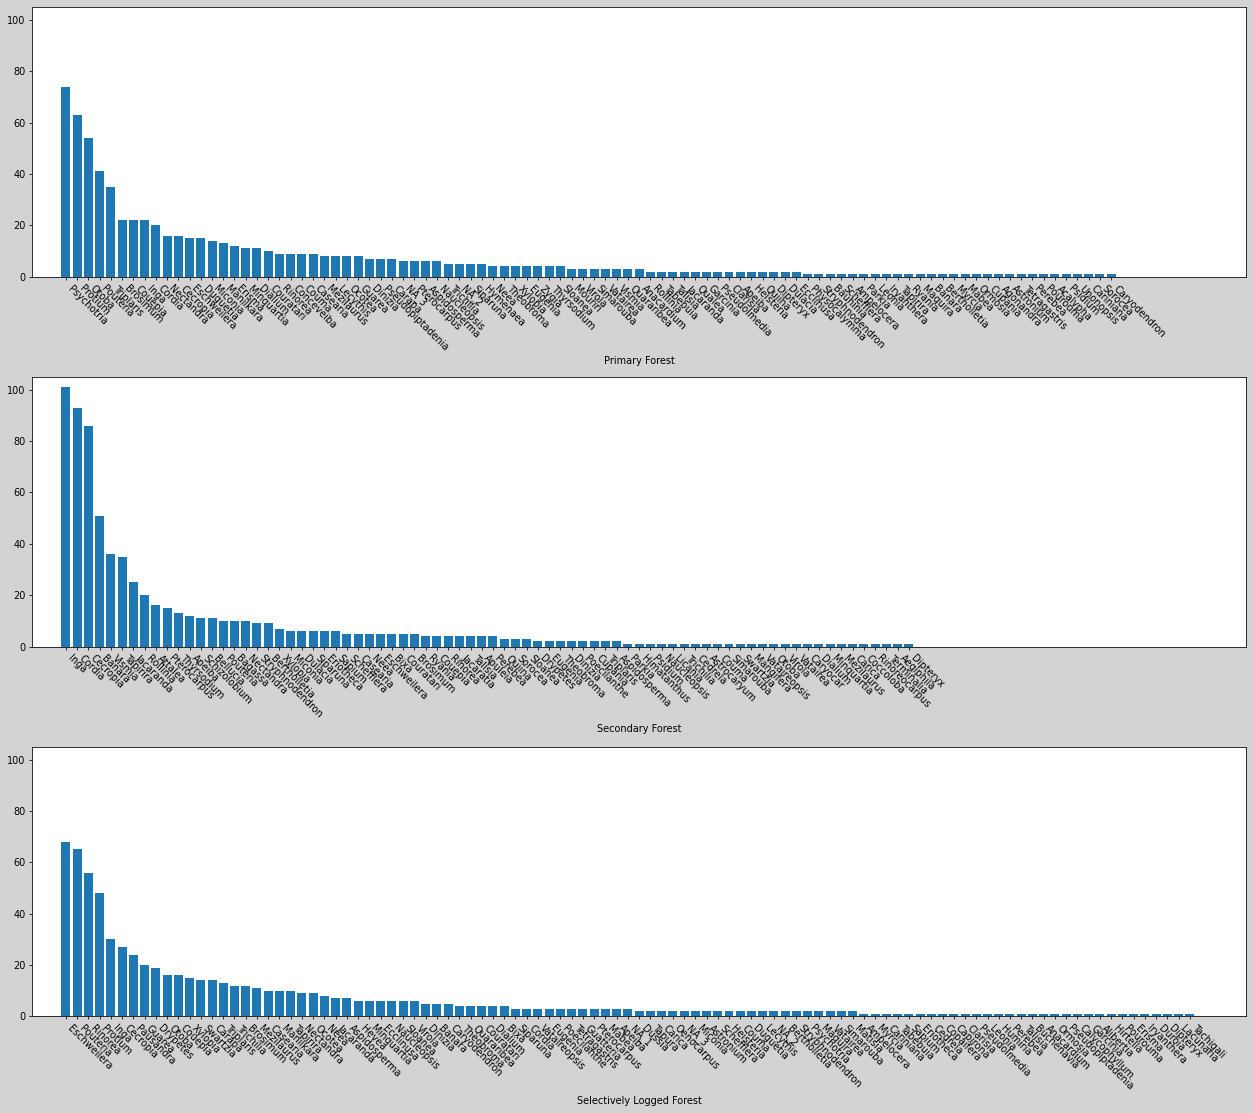

In [15]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize = (18, 16), tight_layout = True, facecolor = 'lightgray')
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation=-45)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation=-45)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation=-45)
plt.show()

2. The sizing and background are good, but the labels are still very hard to read. Let's make them fully vertical by changing the `xticks` label rotation to `-90` and removing the horizontal alignment (`ha`) argument. Also, add the argument `fontsize=13` to each `xticks` function to make the `xticks` font bigger. Finally, let's add a title to the whole graph: `'Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests'`.

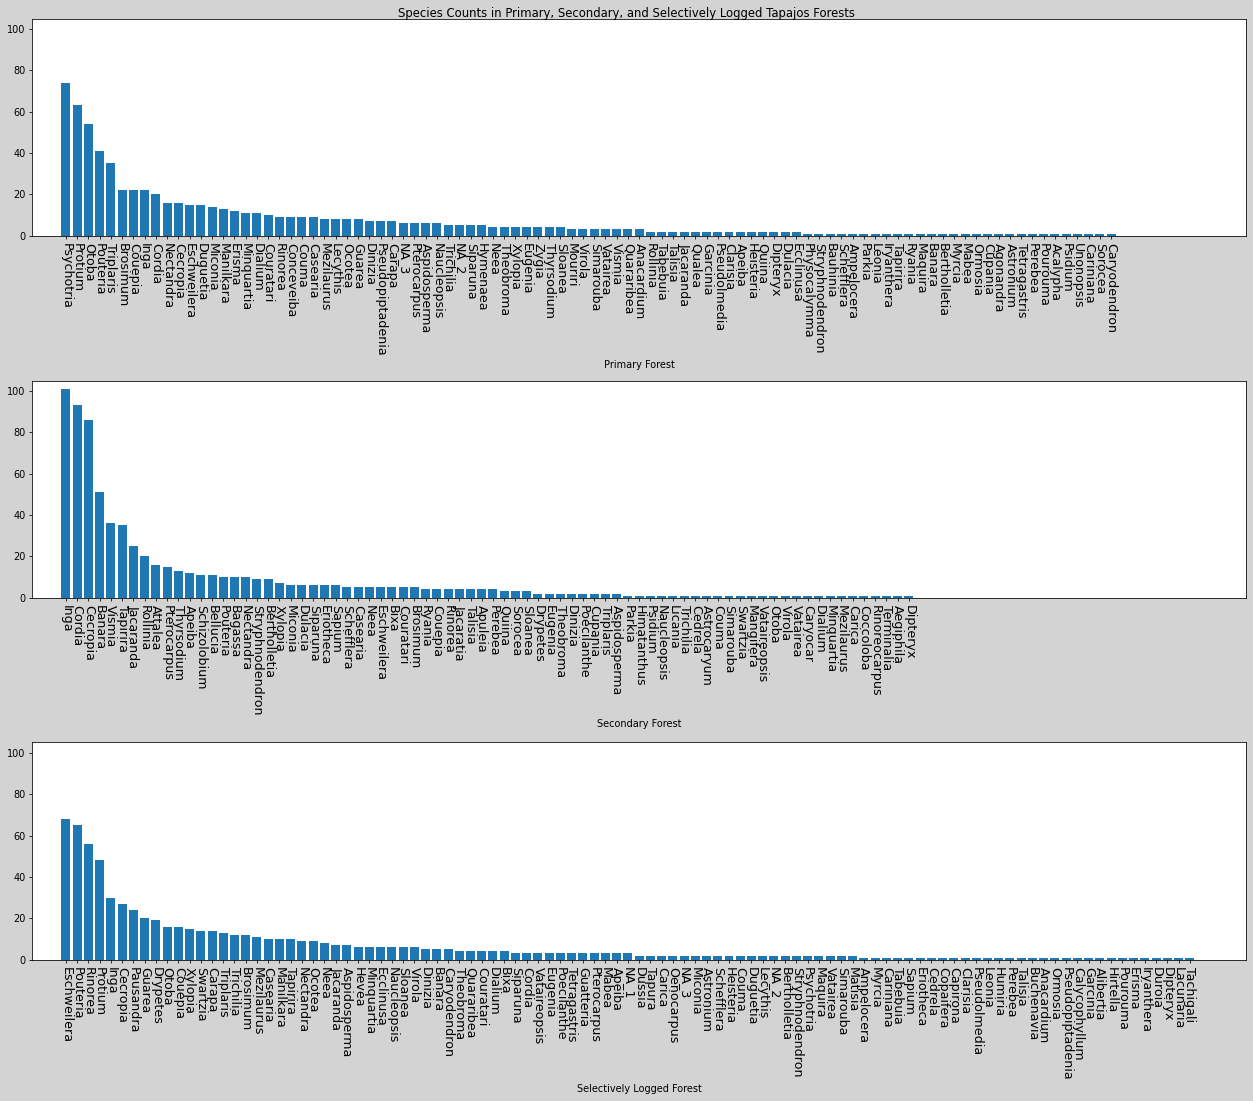

In [16]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize = (18, 16), tight_layout = True, facecolor = 'lightgray')
plt.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests')
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation = -90, fontsize = 13)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation = -90, fontsize = 13)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation = -90, fontsize = 13)
plt.show()

3. To make the title more readable, set the font size to `20`. Setting `tight_layout` to `True` will automatically squeeze the `(x,y)` positions of everything in the figure, which is why our `suptitle` is directly on top of the first graph. So, to give it a little breathing room, add the argument `y=1` to the `suptitle` function to explicitly set the title's y-position a little lower.

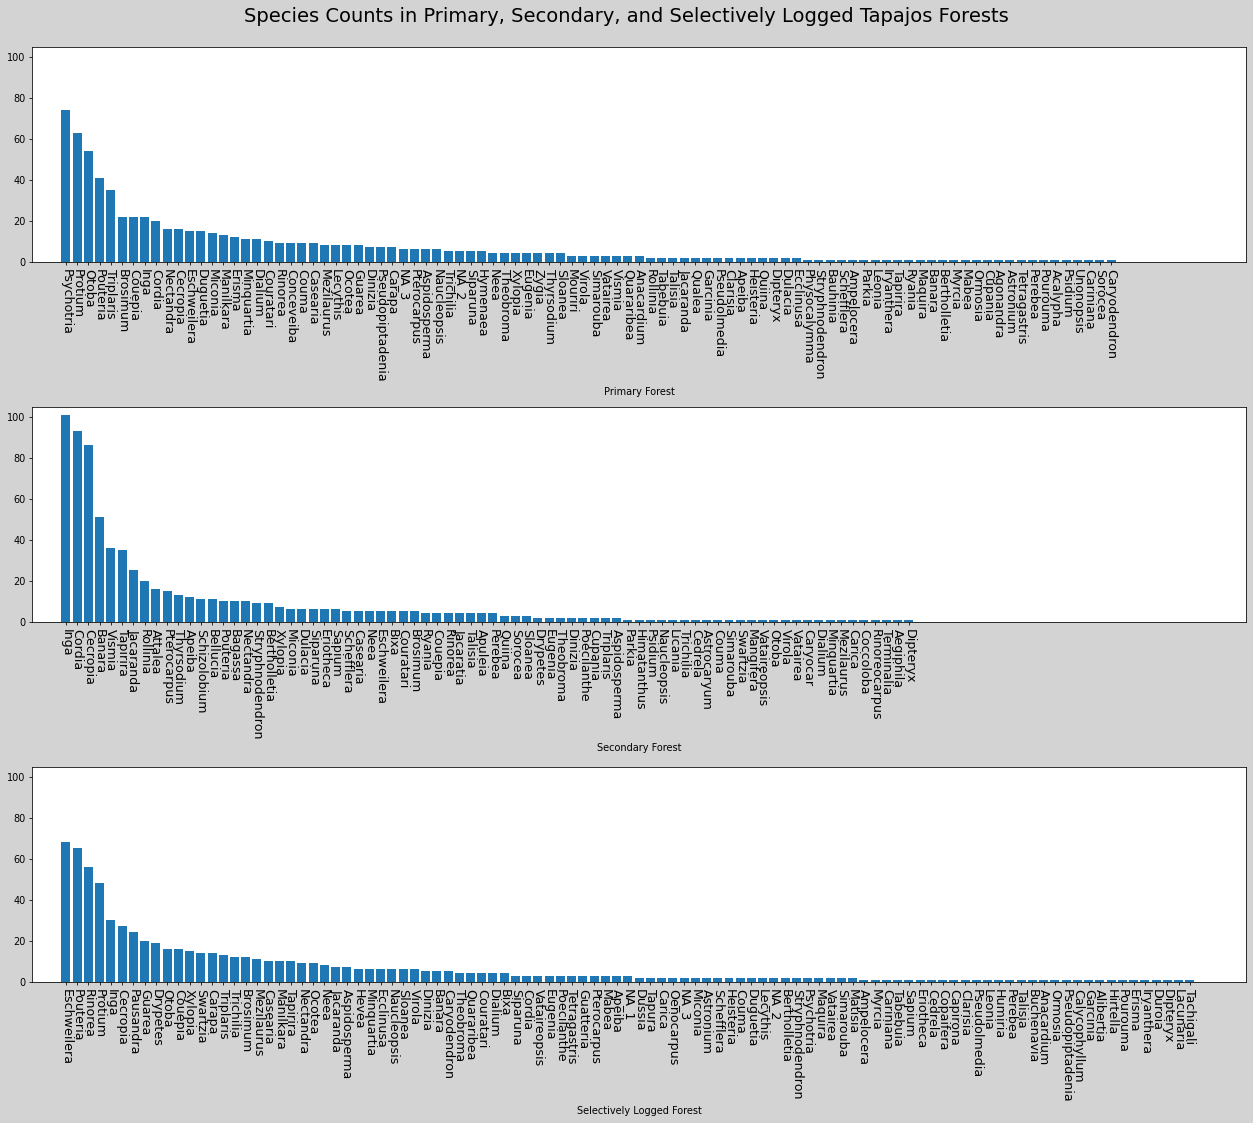

In [17]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize = (18, 16), tight_layout = True, facecolor = 'lightgray')
plt.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests', y = 1, fontsize = 20)
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation = -90, fontsize = 13)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation = -90, fontsize = 13)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation = -90, fontsize = 13)
plt.show()

This graph looks more intentional now, with a background color to make the subplots appear less "floating" and all labels visible. That said, the labels are small and hard to prioritize visually, and the point of the graph is still not obvious. We will address both of these concerns in the next exercise.

### Exercise 5. Use color for emphasis

#### Setup

In [19]:
# import matplotlib, colormap, and pandas
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd

# load data
PF_data = pd.read_csv('PF_genus_counts_color.csv')
SF_data = pd.read_csv('SF_genus_counts_color.csv')
SLF_data = pd.read_csv('SLF_genus_counts_color.csv')
PF_data.head(10)

,genus,counts,color_label
0,Psychotria,74,yellowgreen
1,Protium,63,firebrick
2,Otoba,54,mediumpurple
3,Pouteria,41,deepskyblue
4,Triplaris,35,forestgreen
5,Brosimum,22,lightgray
6,Couepia,22,lightgray
7,Inga,22,orangered
8,Cordia,20,darkturquoise
9,Nectandra,16,lightgray


In [20]:
# display plots correctly
%matplotlib inline

1. To start, run the Setup cells. You’ll notice a new column, `color_label`, in `PF_data`.   Any genus that appears in the top 5 by count for _any_ forest type is assigned a color. Then, run the cell below to load the graph we made in the last exercise.

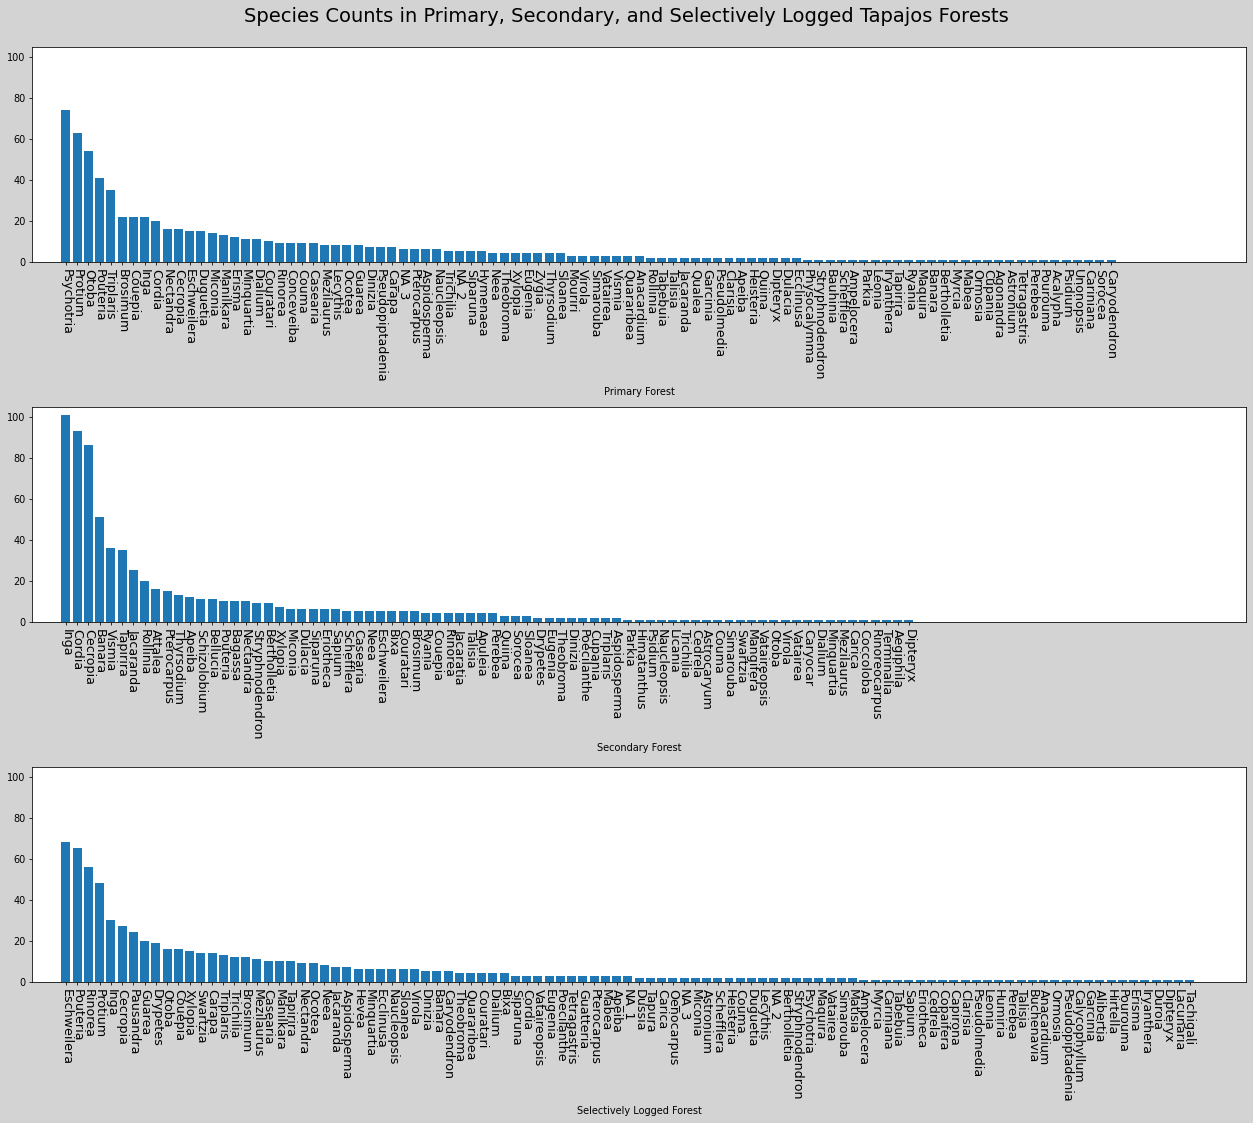

In [21]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize=(18,16), facecolor='lightgray', tight_layout=True) 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests', fontsize=20, y=1)
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=13)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=13)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=13)
plt.show()

2. Assign the color parameter for each bar graph based on the `color_label` column of its respective dataframe.

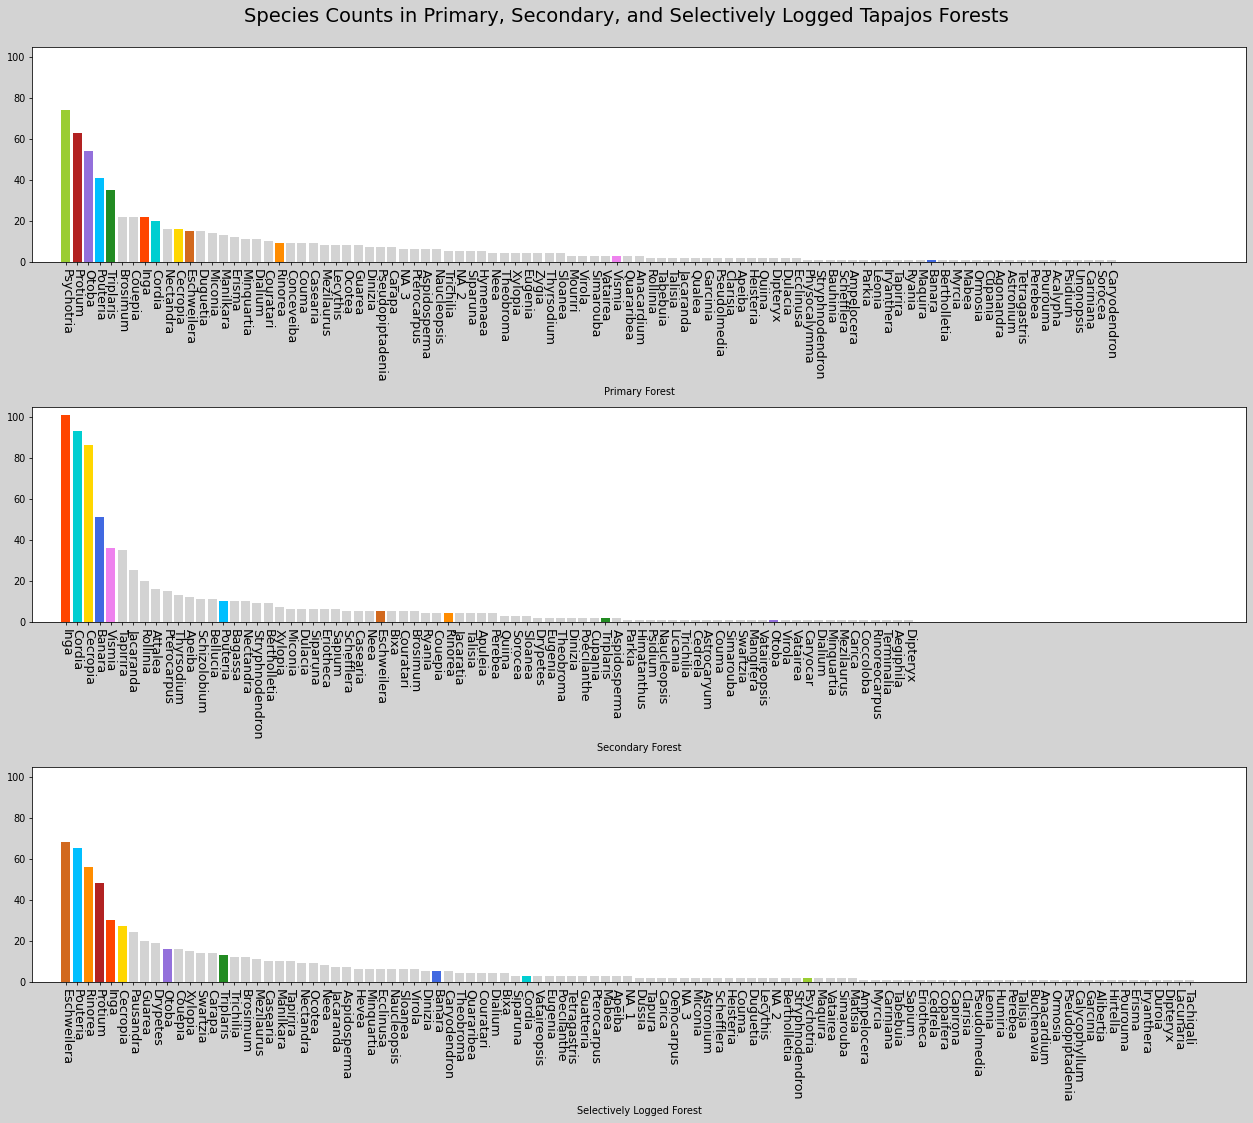

In [22]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize=(18,16), facecolor='lightgray', tight_layout=True) 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests', fontsize=20, y=1)
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts, color = PF_data.color_label)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=13)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts, color = SF_data.color_label)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=13)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts, color = SLF_data.color_label)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=13)
plt.show()

### Exercise 6. Add annotations (pt. I)

#### Setup

In [24]:
# [Add imports and any code provided for the learner here.]
# import matplotlib, colormap, and pandas
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd

# load data
PF_data = pd.read_csv('PF_genus_counts_color.csv')
SF_data = pd.read_csv('SF_genus_counts_color.csv')
SLF_data = pd.read_csv('SLF_genus_counts_color.csv')
PF_data.head()

,genus,counts,color_label
0,Psychotria,74,yellowgreen
1,Protium,63,firebrick
2,Otoba,54,mediumpurple
3,Pouteria,41,deepskyblue
4,Triplaris,35,forestgreen


In [25]:
# display the plots correctly
%matplotlib inline

1. To start, run the Setup cells. Then, we’ll work on the cell below to improve the graph we made in the last exercise. Let’s take advantage of all the empty space we have at the top-right side of each graph and replace the x-axis (where real estate is already very crowded). Create annotations for ‘Primary Forest’, ‘Secondary Forest’ and ‘Selectively Logged Forest’ and position them in the top right corner – `xy` coordinates of `(95, 80)`. Delete the `xlabel` line for each graph. 

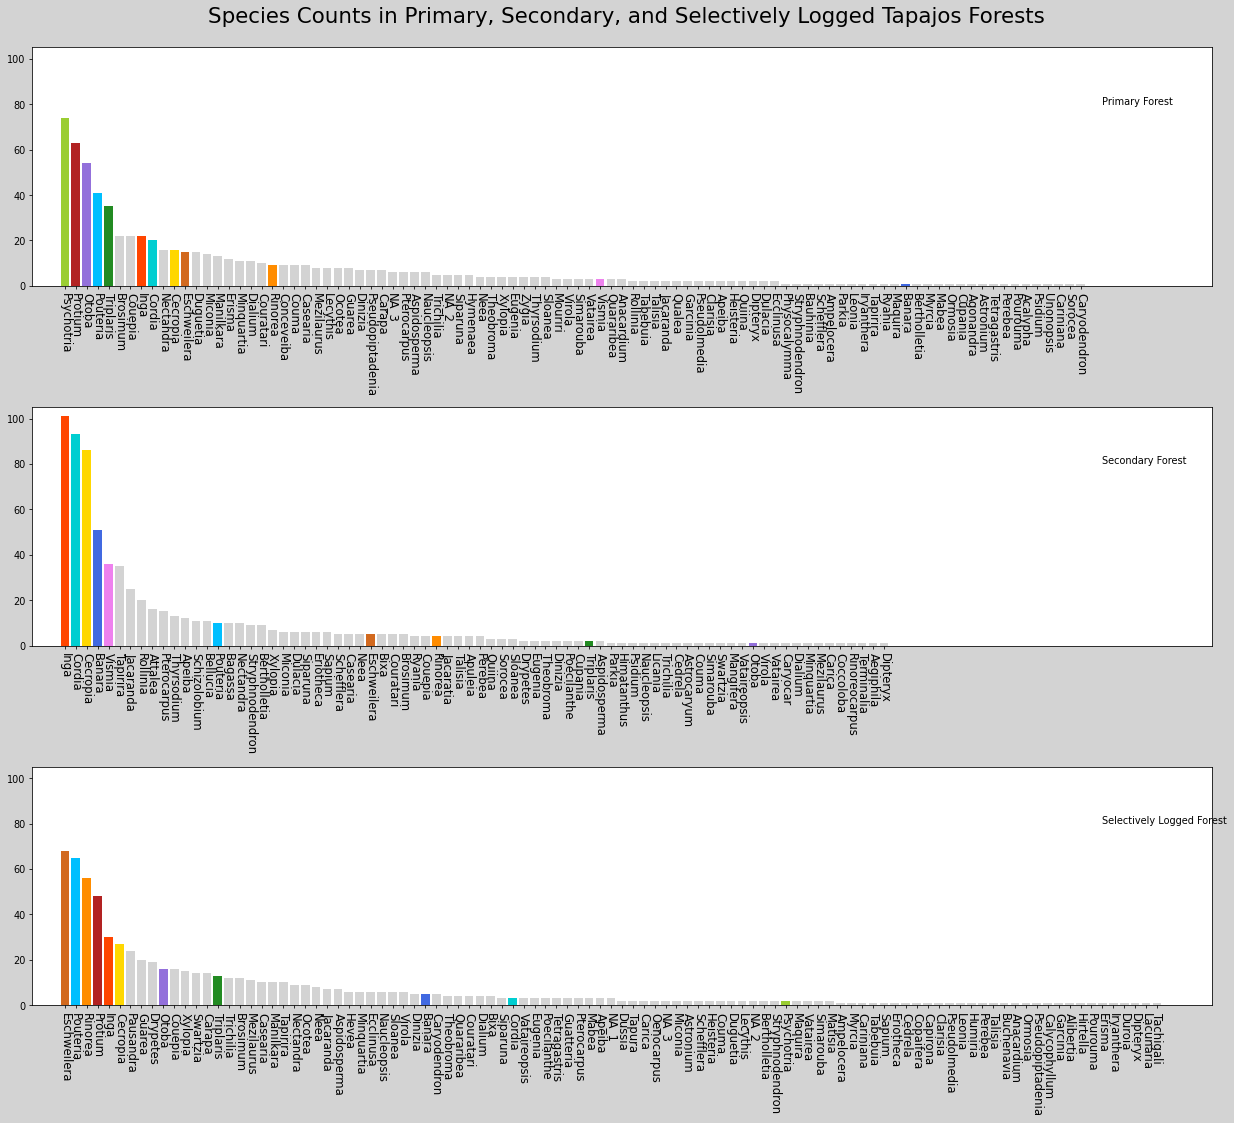

In [26]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize=(18,16), facecolor='lightgray', tight_layout=True) 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests', fontsize=22, y=1)
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts, color=PF_data.color_label)
plt.annotate('Primary Forest', (95,80))
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts, color=SF_data.color_label)
plt.annotate('Secondary Forest', (95,80))
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts, color=SLF_data.color_label)
plt.annotate('Selectively Logged Forest', (95,80))
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.show()

2. That definitely helps the axes to have more room, but these annotations don’t look great yet. Add some formatting: set the font size to 18, the horizontal alignment to `’right’`, and the background color to `’lightgray’`. 

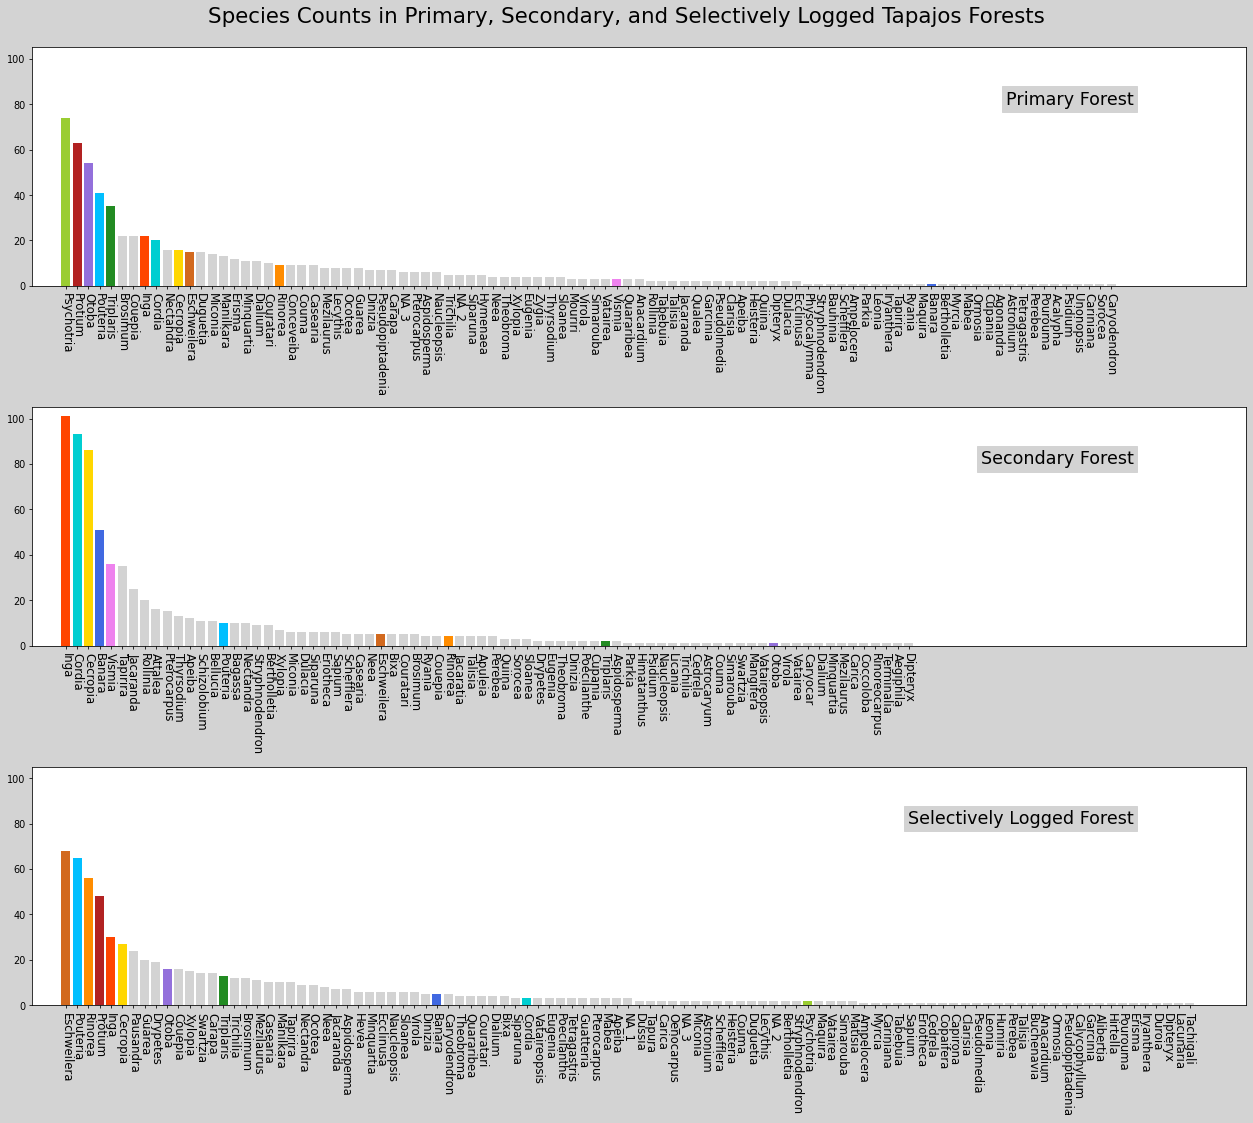

In [27]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize=(18,16), facecolor='lightgray', tight_layout=True) 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests', fontsize=22, y=1)
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts, color=PF_data.color_label)
plt.annotate('Primary Forest', (95,80), fontsize = 18, ha = 'right', backgroundcolor = 'lightgray')

plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts, color=SF_data.color_label)
plt.annotate('Secondary Forest', (95,80), fontsize = 18, ha = 'right', backgroundcolor = 'lightgray')

plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts, color=SLF_data.color_label)
plt.annotate('Selectively Logged Forest', (95,80), fontsize = 18, ha = 'right', backgroundcolor = 'lightgray')

plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.show()

### Exercise 7. Add annotations (pt. II)

#### Setup

In [28]:
# import matplotlib, colormap, and pandas
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd

# load data
PF_data = pd.read_csv('PF_genus_counts_color.csv')
SF_data = pd.read_csv('SF_genus_counts_color.csv')
SLF_data = pd.read_csv('SLF_genus_counts_color.csv')
PF_data.head()

,genus,counts,color_label
0,Psychotria,74,yellowgreen
1,Protium,63,firebrick
2,Otoba,54,mediumpurple
3,Pouteria,41,deepskyblue
4,Triplaris,35,forestgreen


In [29]:
# display the plots correctly
%matplotlib inline

1. Now, let’s add annotations to highlight the `Banara` genus, which occupies a dramatically different position in each type of forest. We’ll do the annotation here, and add an arrow in the next step. Make an annotation of `’Banara’` on each graph, with font size of 14 and the color `’royalblue’` to match the Banara bar color. Set the `xy` value for `Primary Forest` to `(77, 3)`. Set `xy` value for `Secondary Forest` to `(3.5, 48)`. Set the `xy` value for `Selectively Logged Forest` to `(33, 5)`.

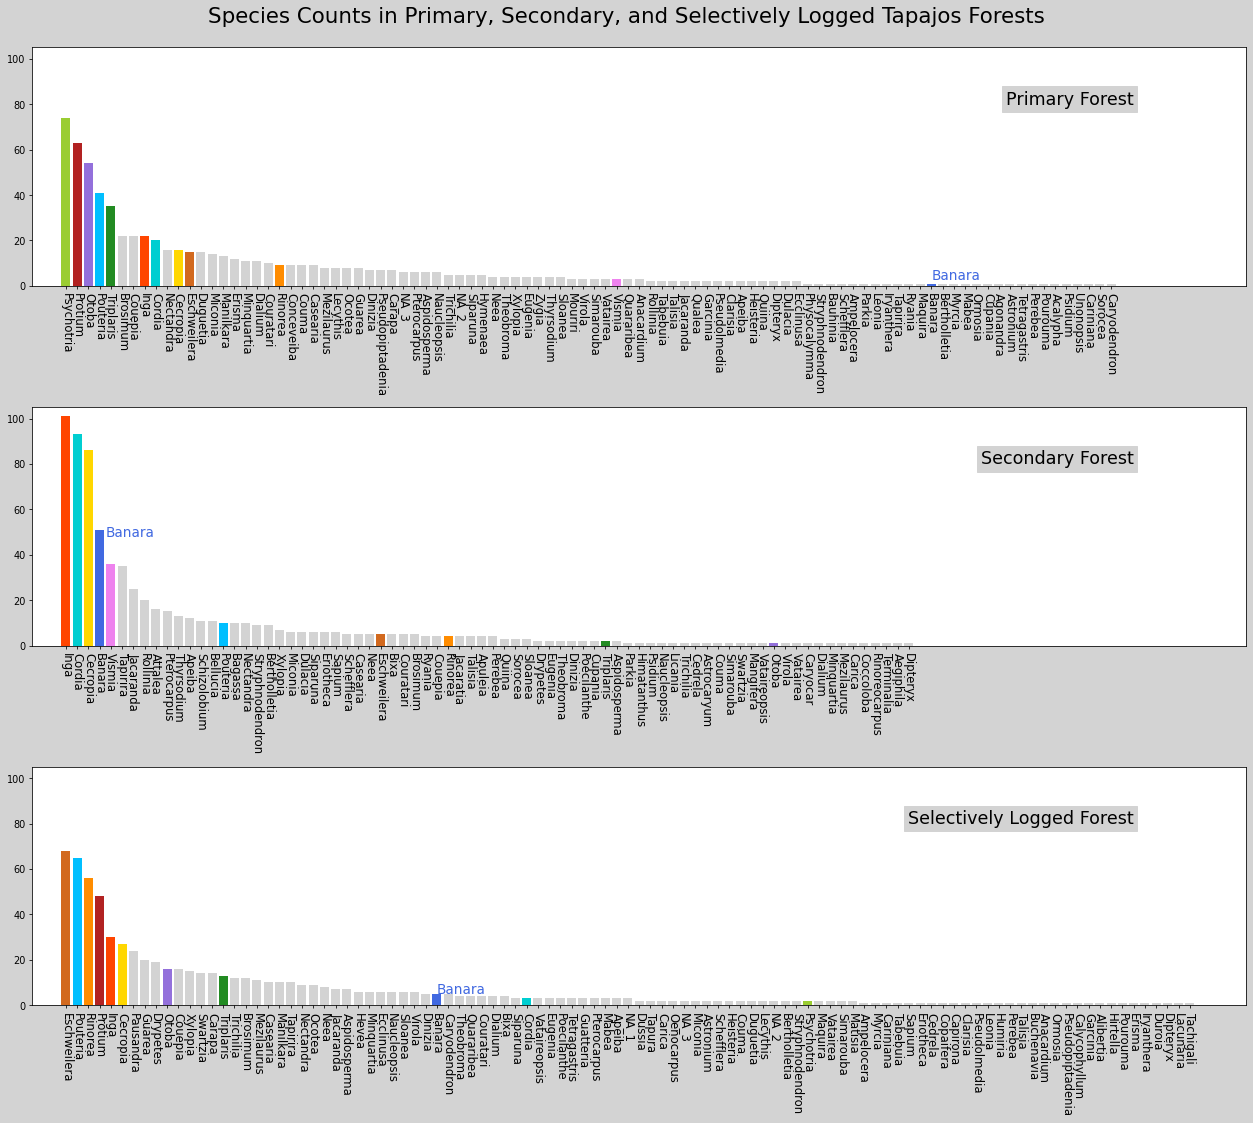

In [30]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize=(18,16), facecolor='lightgray', tight_layout=True) 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests', fontsize=22, y=1)
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts, color=PF_data.color_label)
plt.annotate('Primary Forest', (95, 80), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.annotate('Banara', xy = (77, 3), fontsize = 14, color = 'royalblue')

plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts, color=SF_data.color_label)
plt.annotate('Secondary Forest', (95, 80), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.annotate('Banara', xy = (3.5, 48), fontsize = 14, color = 'royalblue')

plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts, color=SLF_data.color_label)
plt.annotate('Selectively Logged Forest', (95, 80), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.annotate('Banara', xy = (33, 5), fontsize = 14, color = 'royalblue')

plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.show()

2. Let’s add arrows to these labels. Within the `arrowprops` `dict`, set the `arrowstyle` to `’-|>’` for a solid-line arrow. Set the `color` to `royalblue` to match the annotation. Once we add an arrow property, the **arrowhead** will automatically be placed at the `xy` position we just set. To re-set the text at the proper position, we set it an `xytext` value. Set the `xytext` value for `Primary Forest` to `(75, 20)`. Set `xytext` value for `Secondary Forest` to `(8, 60)`. Set the `xytext` value for `Selectively Logged Forest` to `(31, 20)`.

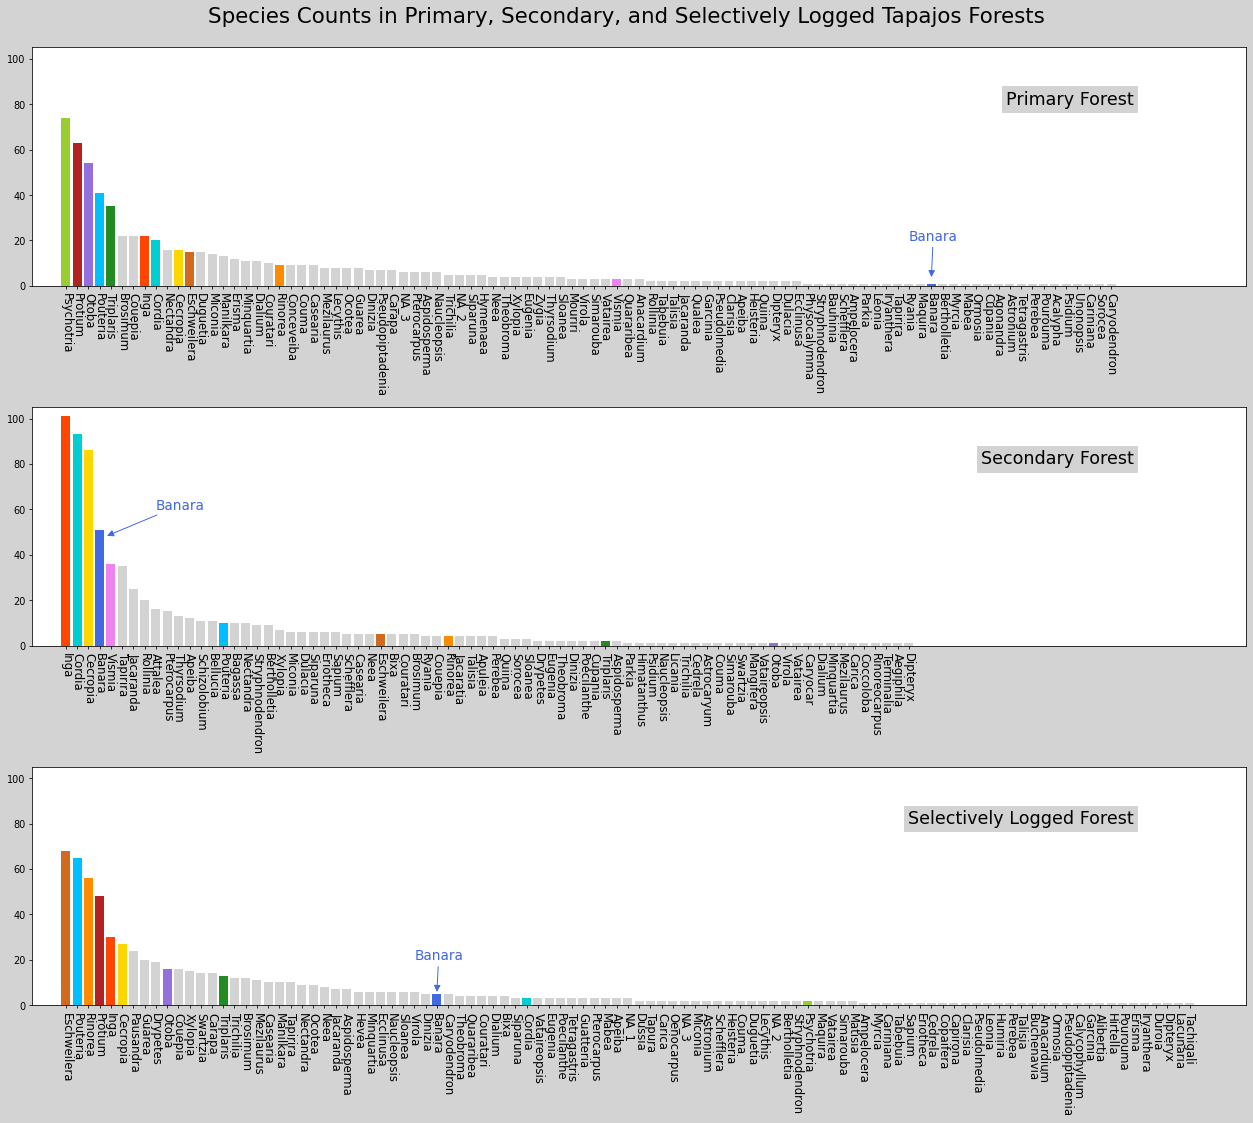

In [31]:
## YOUR SOLUTION HERE ##
fig = plt.figure(figsize=(18,16), facecolor='lightgray', tight_layout=True) 
fig.subplots_adjust(hspace=.6)
fig.suptitle('Species Counts in Primary, Secondary, and Selectively Logged Tapajos Forests', fontsize=22, y=1)

plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts, color=PF_data.color_label)
plt.annotate('Primary Forest', (95, 80), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.annotate('Banara', xy=(77, 3), xytext=(75, 20), fontsize=14, color='royalblue', arrowprops=dict(arrowstyle= '-|>', color='royalblue'))
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts, color=SF_data.color_label)
plt.annotate('Secondary Forest', (95, 80), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.annotate('Banara', xy=(3.5, 48), xytext=(8, 60), fontsize=14, color='royalblue', arrowprops=dict(arrowstyle= '-|>', color='royalblue'))
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts, color=SLF_data.color_label)
plt.annotate('Selectively Logged Forest', (95, 80), fontsize=18, ha='right', backgroundcolor='lightgray')
plt.annotate('Banara', xy=(33, 5), xytext=(31, 20), fontsize=14, color='royalblue', arrowprops=dict(arrowstyle= '-|>', color='royalblue'))
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(rotation=-90, fontsize=12)
plt.show()